In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sb
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

Dataset:
Dua, D.and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of
Information and Computer Science.
Source: Data Source:http://data.seoul.go.kr/  SOUTH KOREA PUBLIC HOLIDAYS. URL: publicholidays.go.kr

In [20]:
# dataset_cols = [Date Rented Bike Count Hour Temperature Humidity Wind speed Visibility Dew point temperature Solar Radiation Rainfall]

In [21]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv('SeoulBikeData.csv', encoding='ISO-8859-1').drop(['Date', 'Holiday', 'Seasons'], axis = 1)


In [22]:
df.columns = dataset_cols
df["functional"]= (df["functional"] == 'Yes').astype(int)

In [23]:
df = df[df['hour'] == 12]

In [24]:
df = df.drop(['hour'], axis = 1)

In [25]:
df

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
8652,752,9.1,57,1.1,562,1.0,1.69,0.0,0.0,1
8676,672,9.3,61,1.5,390,2.1,0.85,0.0,0.0,1
8700,635,7.9,14,1.7,1688,-18.0,1.81,0.0,0.0,1
8724,661,5.6,27,0.3,1522,-11.9,0.34,0.0,0.0,1


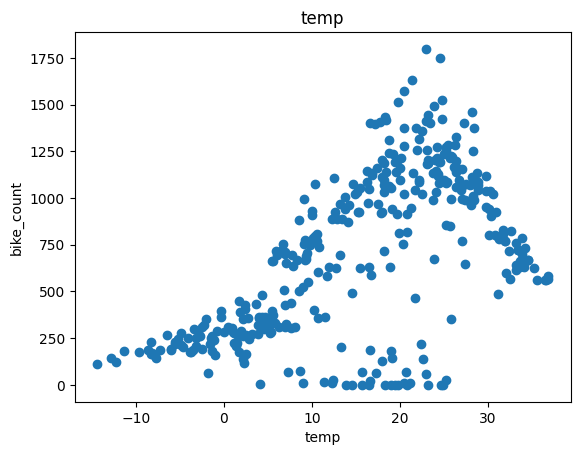

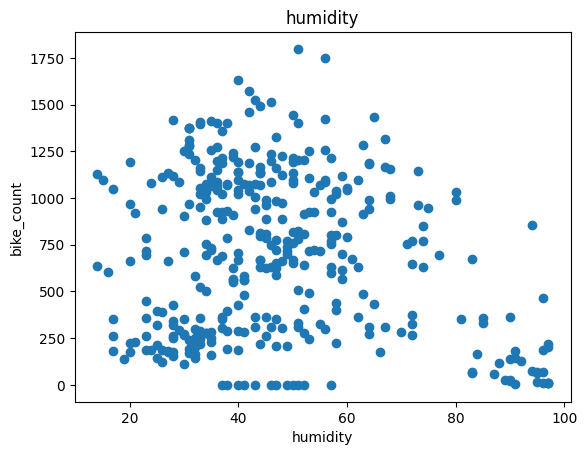

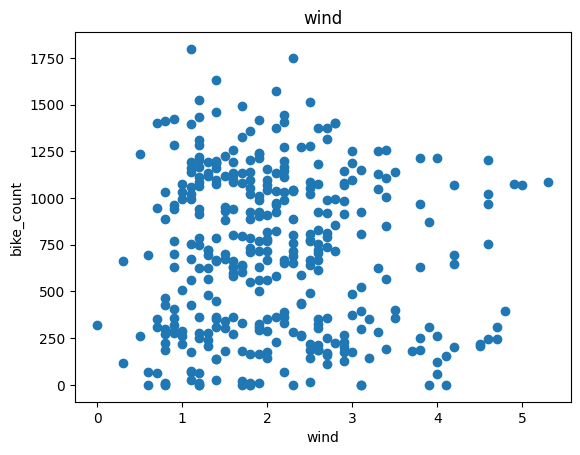

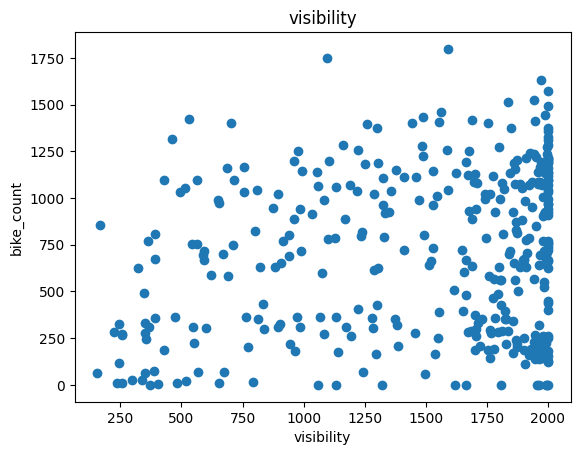

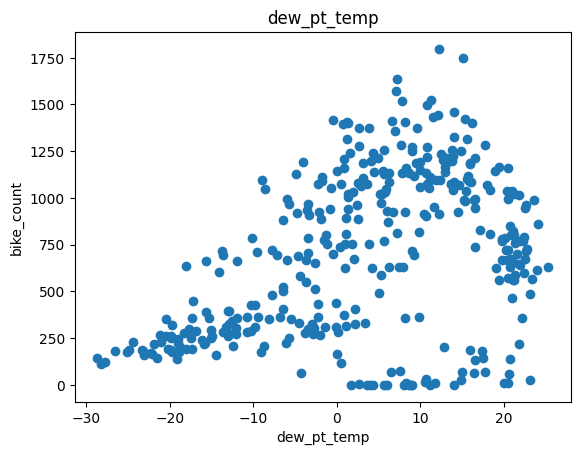

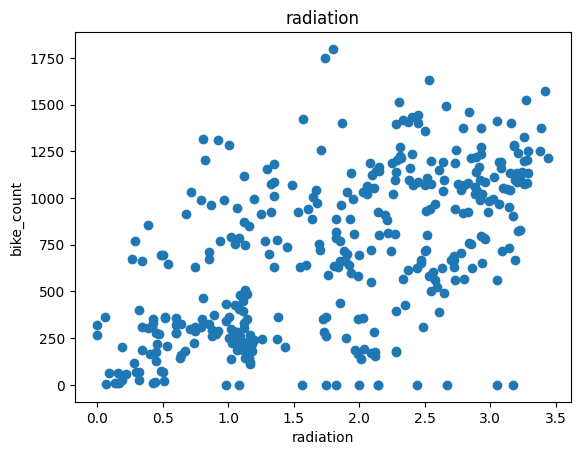

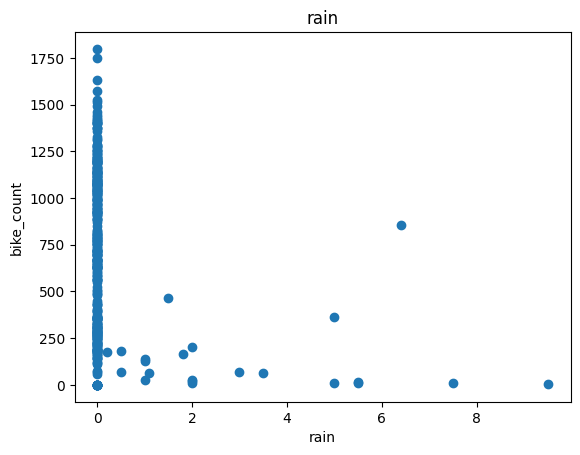

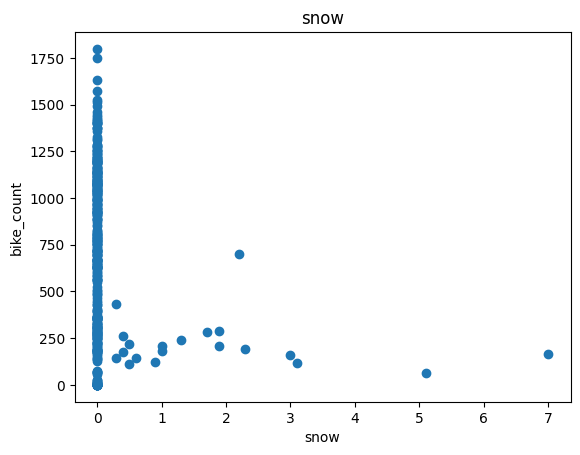

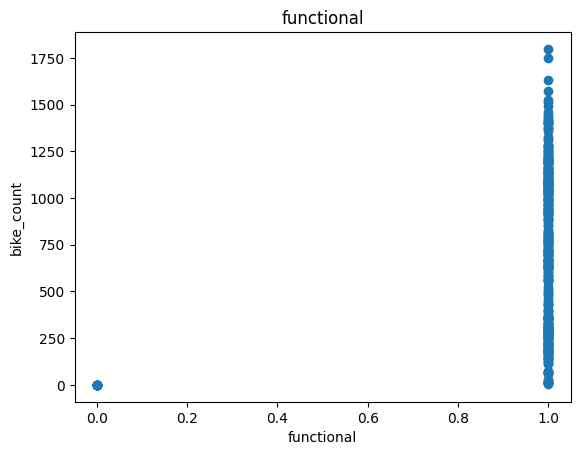

In [26]:
for label in df.columns[1:]:
  plt.scatter(df[label], df['bike_count'])
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('bike_count')
  plt.show()

In [27]:
df = df.drop(['wind', 'visibility', 'functional'], axis = 1)

In [28]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


## Seperating data into test, val, train

In [29]:
training, valtest = train_test_split(df, test_size=0.4, random_state=42)
validation, testing = train_test_split(valtest, test_size=0.5, random_state=42)

In [30]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    x = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels)== 1:
      x = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      x = dataframe[x_labels].values
  y = dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((x,y))
  return data, x, y

In [31]:
_, x_train_temp, y_train_temp = get_xy(training, 'bike_count', x_labels = ['temp'] )
_, x_val_temp, y_val_temp = get_xy(validation, 'bike_count', x_labels = ['temp'] )
_, x_test_temp, y_test_temp = get_xy(testing, 'bike_count', x_labels = ['temp'] )

In [32]:
x_train_temp.shape

(219, 1)

# Simple Linear Regression(1 Feature)

In [33]:
temp_reg = LinearRegression()
temp_reg.fit(x_train_temp,y_train_temp)

LinearRegression()

In [34]:
print(temp_reg.coef_, temp_reg.intercept_)   #these are the coeff(b1) and intercept(bo) in the formula y = bo +b1x

[[19.90862587]] [393.77476482]


In [35]:
temp_reg.score(x_test_temp, y_test_temp)

0.3883693945086132

Text(0, 0.5, 'bikes')

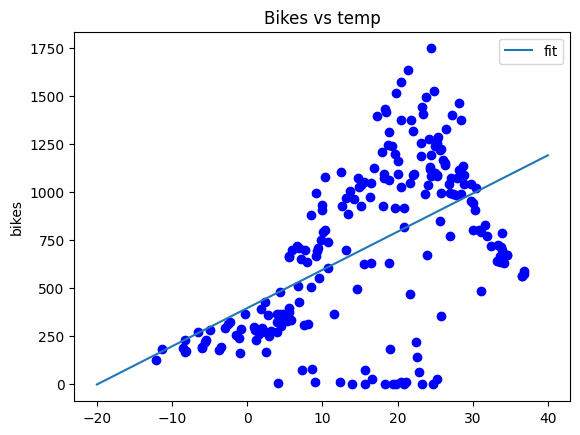

In [36]:
plt.scatter(x_train_temp, y_train_temp, color = 'b')
x = np.linspace(-20,40,100)
plt.plot(x, temp_reg.predict(x.reshape(-1,1)), label = 'fit')
plt.legend()
plt.title('Bikes vs temp')
plt.ylabel('bikes')

# Multiple Linear Regression(Multiple Features)

In [37]:
training, valtest = train_test_split(df, test_size=0.4, random_state=42)
validation, testing = train_test_split(valtest, test_size=0.5, random_state=42)


# def get_xy_multiple(dataframe, y_label, x_labels=None, train_data= False, scaler = None):
#   dataframe = copy.deepcopy(dataframe)
#   if x_labels is None:
#     x = dataframe[[c for c in dataframe.columns if c!=y_label]].values
#   else:
#     if len(x_labels)== 1:
#       x = dataframe[x_labels[0]].values.reshape(-1, 1)
#     else:
#       x = dataframe[x_labels].values
#   y = dataframe[y_label].values.reshape(-1,1)

#   if train_data:
#     scaler = StandardScaler()
#     x = scaler.fit_transform(x)  # Fit and transform training data
#   else:
#     x = scaler.transform(x)  # Transform using the fitted scaler for validation/test data
#   data = np.hstack((x,y))
#   return data, x, y, scaler




In [38]:
_, x_train, y_train = get_xy(training, 'bike_count', x_labels = df.columns[1:])
_, x_val, y_val, = get_xy(validation, 'bike_count', x_labels = df.columns[1:])
_, x_test, y_test, = get_xy(testing, 'bike_count', x_labels = df.columns[1:])

In [39]:
all_reg = LinearRegression()
all_reg.fit(x_train, y_train)

LinearRegression()

In [40]:
all_reg.score(x_test, y_test)

0.4598200253856244

In [41]:
y_pred_lr=all_reg.predict(x_test)

# Regression With NN

## For Single Feature

In [42]:
def plot_loss(history):
  plt.plot(history.history['loss'], label = 'loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid()
  plt.show

In [43]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis = None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])
temp_nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.1),
    loss = 'mean_squared_error',
)
history = temp_nn_model.fit(
    x_train_temp.reshape(-1), y_train_temp,
    epochs = 1000,
    verbose = 0,
    validation_data = (x_val_temp,y_val_temp)

)

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
predictions = temp_nn_model.predict(x_test_temp)

# Calculate MSE, RMSE, MAE, and R² Score
mse = mean_squared_error(y_test_temp, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_temp, predictions)
r2 = r2_score(y_test_temp, predictions)

# Print results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Mean Squared Error (MSE): 110529.31943878152
Root Mean Squared Error (RMSE): 332.45950044897427
Mean Absolute Error (MAE): 259.06952405955695
R² Score: 0.3019832173550028


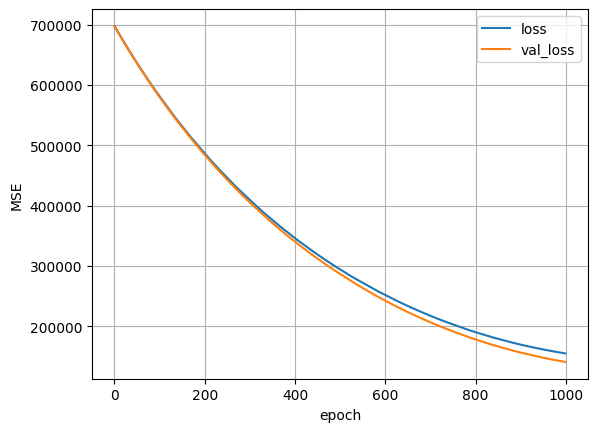

In [46]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


Text(0, 0.5, 'bikes')

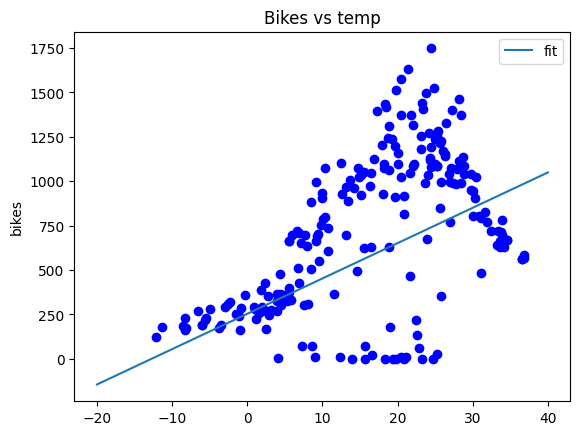

In [47]:
plt.scatter(x_train_temp, y_train_temp, color = 'b')
x = np.linspace(-20,40,100)
plt.plot(x, temp_nn_model.predict(x.reshape(-1,1)), label = 'fit')
plt.legend()
plt.title('Bikes vs temp')
plt.ylabel('bikes')

## For All the features

In [48]:
normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis = -1)
normalizer.adapt(x_train)

c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
nn_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(1)
])
nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.1),
    loss = 'mean_squared_error',
)
history = nn_model.fit(
    x_train, y_train,
    epochs = 1000,
    verbose = 0,
    validation_data = (x_val,y_val)

)

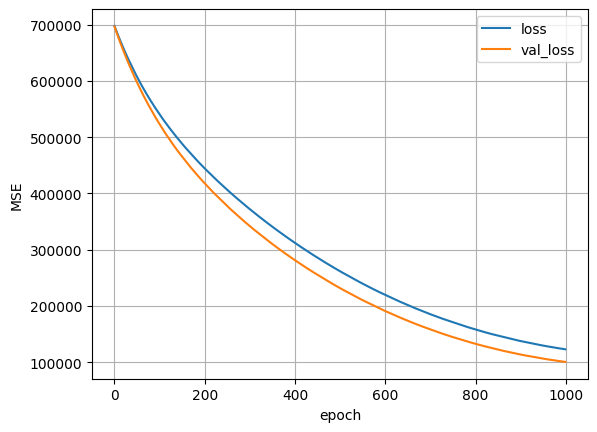

In [50]:
plot_loss(history)

In [51]:

# Make predictions
predictions = nn_model.predict(x_test)

# Calculate MSE, RMSE, MAE, and R² Score
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Mean Squared Error (MSE): 97773.77159329316
Root Mean Squared Error (RMSE): 312.6879780120962
Mean Absolute Error (MAE): 249.04308705787136
R² Score: 0.3825372867475453


# Neural Network(Multiple Nodes)

## For Single Feature

In [52]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis = None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = 'mean_squared_error'
)


history = nn_model.fit(
    x_train_temp,y_train_temp,
    epochs = 100,
    validation_data = (x_val_temp,y_val_temp),
    verbose = 0
)

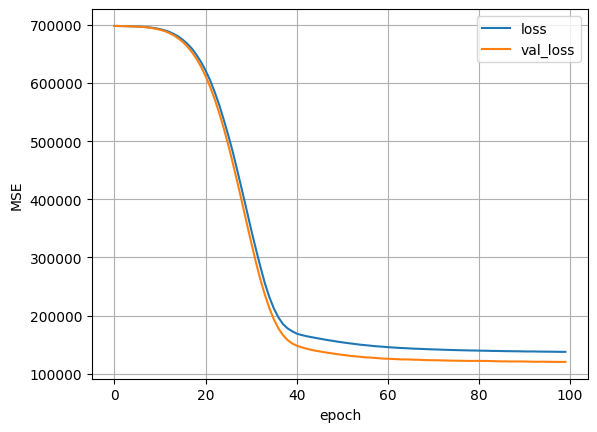

In [54]:
plot_loss(history)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/stepWARNING:tensorflow:5 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000020922FD3880> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Text(0, 0.5, 'bikes')

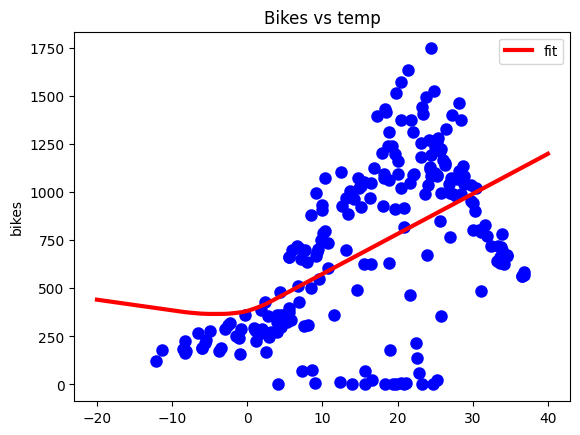

In [55]:
plt.scatter(x_train_temp, y_train_temp, color = 'b', lw = 3)
x = np.linspace(-20,40,100)
plt.plot(x,nn_model.predict(x.reshape(-1,1)), label = 'fit', lw = 3, color = 'r')
plt.legend()
plt.title('Bikes vs temp')
plt.ylabel('bikes')

## For All the Features

In [56]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis = -1)
all_normalizer.adapt(x_train)



In [57]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = 'mean_squared_error'
)

In [58]:
history = nn_model.fit(
    x_train, y_train,
    epochs = 100,
    verbose = 0,
    validation_data = (x_val,y_val)

)

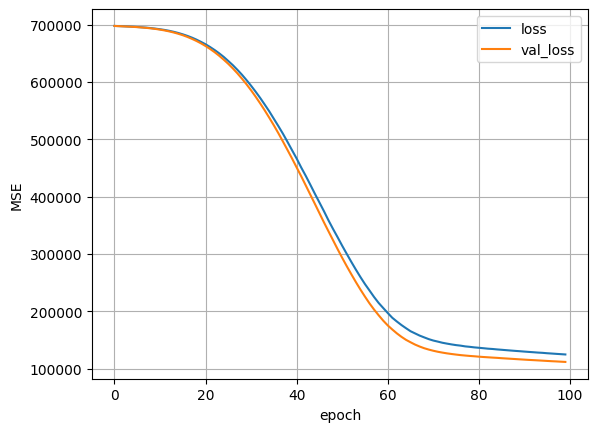

In [59]:
plot_loss(history)

# MSE For Linear Regression And Neural Net

In [60]:
y_pred_lr=all_reg.predict(x_test)
y_pred_nn = nn_model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [67]:
def MSE(y_pred, y_true):
    return (np.square(y_pred-y_true)).mean()

In [68]:
MSE(y_pred_lr, y_test)

85536.23129567475

In [69]:
MSE(y_pred_nn, y_test)

117530.5940590512